In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("train.csv")
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

<Axes: >

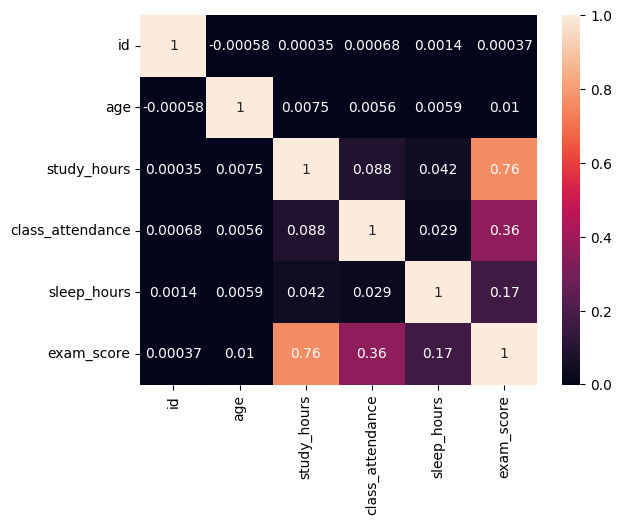

In [15]:
sns.heatmap(df.select_dtypes(include=['int','float']).corr(),annot=True)

In [3]:
X.drop('id',axis=1,inplace=True)

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train, y_val=train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
X_val

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty
364426,18,other,b.sc,3.07,88.3,yes,4.1,average,coaching,low,hard
224752,21,male,b.com,3.28,49.6,no,7.0,poor,online videos,high,moderate
110423,20,female,bca,4.45,42.5,yes,6.7,good,group study,high,moderate
272555,21,male,b.com,4.19,82.8,yes,5.7,poor,mixed,low,hard
199651,21,female,b.com,1.31,91.2,yes,8.5,poor,mixed,low,easy
...,...,...,...,...,...,...,...,...,...,...,...
514830,17,female,bba,0.28,55.7,yes,4.8,average,self-study,low,easy
308756,18,other,ba,6.92,84.0,yes,9.2,good,coaching,high,hard
608482,20,male,b.sc,2.08,81.1,no,8.5,average,group study,medium,hard
82568,19,other,b.sc,4.29,61.3,yes,5.0,poor,coaching,low,moderate


In [6]:
cat_cols=df.select_dtypes(include=['object'])

In [7]:
from category_encoders import TargetEncoder
encoder=TargetEncoder(cols=cat_cols)
X_train=encoder.fit_transform(X_train,y_train)
X_val=encoder.transform(X_val)

In [8]:
X_train

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty
625149,20,62.772761,62.485610,0.84,79.0,62.484229,9.9,67.855572,65.113844,57.923662,62.667818
276435,19,62.527161,62.485610,3.35,94.2,62.484229,6.0,67.855572,60.481651,63.014571,62.585163
43949,18,62.527161,61.859279,2.20,87.5,62.484229,6.8,67.855572,59.714018,66.677166,62.171974
280523,18,62.147328,62.559136,3.10,64.0,62.484229,7.6,62.627994,57.654942,63.014571,62.585163
619977,22,62.527161,62.433500,1.44,56.2,62.484229,5.5,62.627994,59.714018,63.014571,62.667818
...,...,...,...,...,...,...,...,...,...,...,...
110268,21,62.147328,63.164315,2.88,93.4,62.484229,6.1,56.984544,57.654942,57.923662,62.585163
259178,20,62.147328,62.559136,6.90,74.5,62.484229,4.3,62.627994,59.714018,63.014571,62.585163
365838,20,62.772761,62.485610,1.54,59.3,62.484229,8.4,67.855572,65.113844,57.923662,62.667818
131932,20,62.772761,62.519381,6.30,88.4,62.484229,6.2,56.984544,60.481651,57.923662,62.585163


In [9]:
from sklearn.preprocessing import StandardScaler 
st=StandardScaler()
X_train=st.fit_transform(X_train)
X_val=st.transform(X_val)

In [10]:
y_train=y_train.values
y_val=y_val.values

Rmse value:8.905122991275386
R2_score:0.7141237567954193


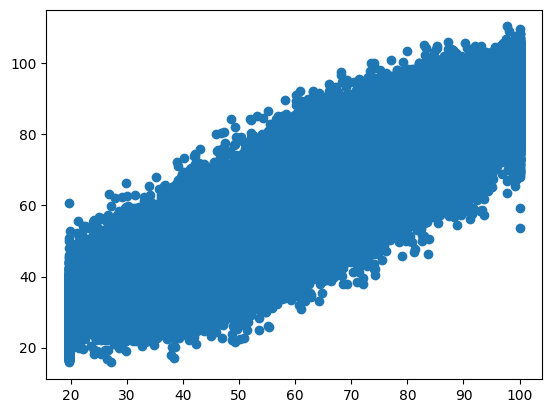

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,root_mean_squared_error
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_val)
rmse=root_mean_squared_error(y_pred,y_val)
score=r2_score(y_pred,y_val)
print(f"Rmse value:{rmse}")
print(f"R2_score:{score}")
plt.scatter(y_val,y_pred)

Rmse value:8.905122894305256
R2_score:0.7141227566402367


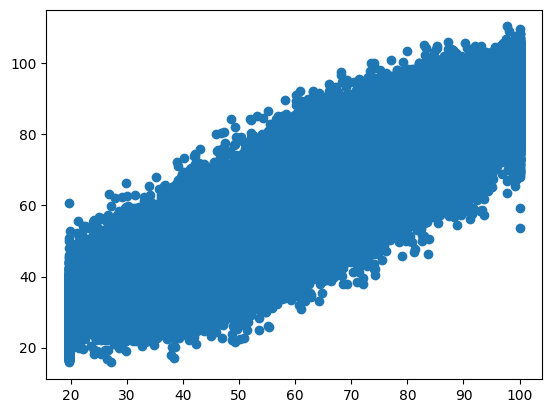

In [12]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,root_mean_squared_error
ridgecv=RidgeCV()
ridgecv.fit(X_train,y_train)
y_pred=ridgecv.predict(X_val)
rmse=root_mean_squared_error(y_pred,y_val)
score=r2_score(y_pred,y_val)
print(f"Rmse value:{rmse}")
print(f"R2_score:{score}")
plt.scatter(y_val,y_pred)